# Developing AI tools - Supervised Regression

The second module of our **AI4Business** course describes how to develop AI solutions that generate value.
This tutorial details the practical AI development process with a **supervised regression** example in Python.
The Data Science Life Cycle consists of the following five steps:
1. Business Understanding
2. Data Preparation & Understanding
3. Modeling
4. Deployment
5. Monitoring

In this tutorial we put focus on the first three steps, as indicated in the figure below. The deployment and monitoring steps are discussed in detail in modules four and five of the course.

![lifecycle](img/Lifecycle.png)

## 1. Business Understanding

Every AI project should start from a **business opportunity** to create value. Imagine that we are a real estate agency in Boston, maintaining a portfolio of houses which we rent or sell in the housing market. The accurate valuation of housing properties is therefore crucial for our business.

We are currently relying on expert knowledge and rule-based systems to determine the value of a house. We are however wondering whether AI is able to deliver extra insights that we are currently missing in our valuation process. Furthermore, we are interested in automating this process as much as possible.

Our goal, stated as a prediction task, is therefore the following: **predict the price of a housing property based on characteristics of said house**. This allows us to accurately value each property to optimize our business returns.

![housing](img/Housing.jpg)

## 2. Data Preparation & Understanding

After defining our business problem, we are ready to start working towards a solution. The first important step is to obtain, prepare and understand **data** that is relevant to solve our problem. We therefore need information on housing prices and property characteristics in the neighborhood of Boston.

### Obtaining data

The first step is to actually find relevant data. The [PyDataset](https://github.com/iamaziz/PyDataset) package provides instant access to several datasets within Python. Luckily for us, there is a dataset available with information on Boston housing prices in this package. The following steps are executed to obtain the data:
1. Import the data() function from the pydataset package
2. Use this function as data('Boston') to load the titanic data

We save the dataset in an object called *housing*.

In [1]:
# Load the housing dataset
from pydataset import data
housing = data('Boston')

That went smooth and fast! Now that we have the data, we can have a first look at it by inspecting the *housing* object.

In [2]:
# Inspect the housing data
housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


The data frame has 506 rows and 14 columns on housing values in suburbs of Boston:
- **crim**: per capita crime rate by town.
- **zn**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus**: proportion of non-retail business acres per town.
- **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **nox**: nitrogen oxides concentration (parts per 10 million).
- **rm**: average number of rooms per dwelling.
- **age**: proportion of owner-occupied units built prior to 1940.
- **dis**: weighted mean of distances to five Boston employment centres.
- **rad**: index of accessibility to radial highways.
- **tax**: full-value property-tax rate per 10,000 USD.
- **ptratio**: pupil-teacher ratio by town.
- **black**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- **lstat** lower status of the population (percent).
- **medv**: median value of owner-occupied homes in 1000s USD.

Now we have to ask ourself the following question: **Is this data relevant to solve our business problem?** Remember that the business goal is to predict the price of a housing property based on its characteristics. We have an indicator for the house's value, so **medv** is therefore our **target** to model and predict. We have several housing characteristics that we can use to predict the target, so these are our **features**. It seems that this is a good dataset to start from with relevant information for our business problem.

### Ethical considerations

Notice how the data contains the feature **black** which measures the proportion of black people by town. Even though this feature is available, that does not mean we need to use it. Such features coding for race are prone to lead to racial biases in AI systems and we therefore decide to throw this feature out of the data and not use it at all.

In [3]:
# Remove the feature 'black' from the data
housing.drop(columns=['black'], inplace = True)

### Quality check

Before continuing it is also very important to check the **quality** of our data. Useful features and target is one thing, but if they have a lot of missing or wrong values then they are not that valuable. Below we calculate the number of missing values for each column in our data, which is apparently equal to zero!

In [4]:
# Get the number of missing values per column
print(housing.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64


Relevant and high-quality data, that's great! Let's gain some insights in the data then.

### Inspect the data

We obtain some information on the different columns in the data via the .info() method. This teaches us that all columns contain zero missing values (which we already knew) and that all columns contain numerical values (either integers or floats).

In [5]:
# Get some info on the data via the .info() method
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


We check how many unique values each column has and observe that most columns contain hundreds of possibilities. Feature 'chas' only contains two (as this is a dummy indicator) and 'rad' contains nine as this feature represents an index.

In [6]:
# Get the number of unique values via the .nunique() method
print(housing.nunique())

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
lstat      455
medv       229
dtype: int64


### Univariate exploration

A first interesting insight to learn is the distribution of the different columns. Below we show a table with summary statistics for each column such as the mean, minimum, maximum, and quartiles. The minimum, average and maximum target values are for example 5, 22.5 and 50 respectively. The median equals 21.2, indicating a slightly skewed distribution.

In [7]:
# Get some summary statistics via the .describe() method
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Tables are interesting, but graphs are nicer to look at. For numerical data, histograms are a very useful tool to visualize distributions. For this we use the very popular [pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) module from the [matplotlib](https://matplotlib.org) package in Python.

In [8]:
# Import 'pyplot' module from 'matplotlib' package
import matplotlib.pyplot as plt

Below we show histograms for each columns in the Boston housing data. We observe how our target 'medv' follows a somewhat normal distribution with a slightly heavier right tail. Do you notice something weird about one of the features? *Hint: look for an index.*

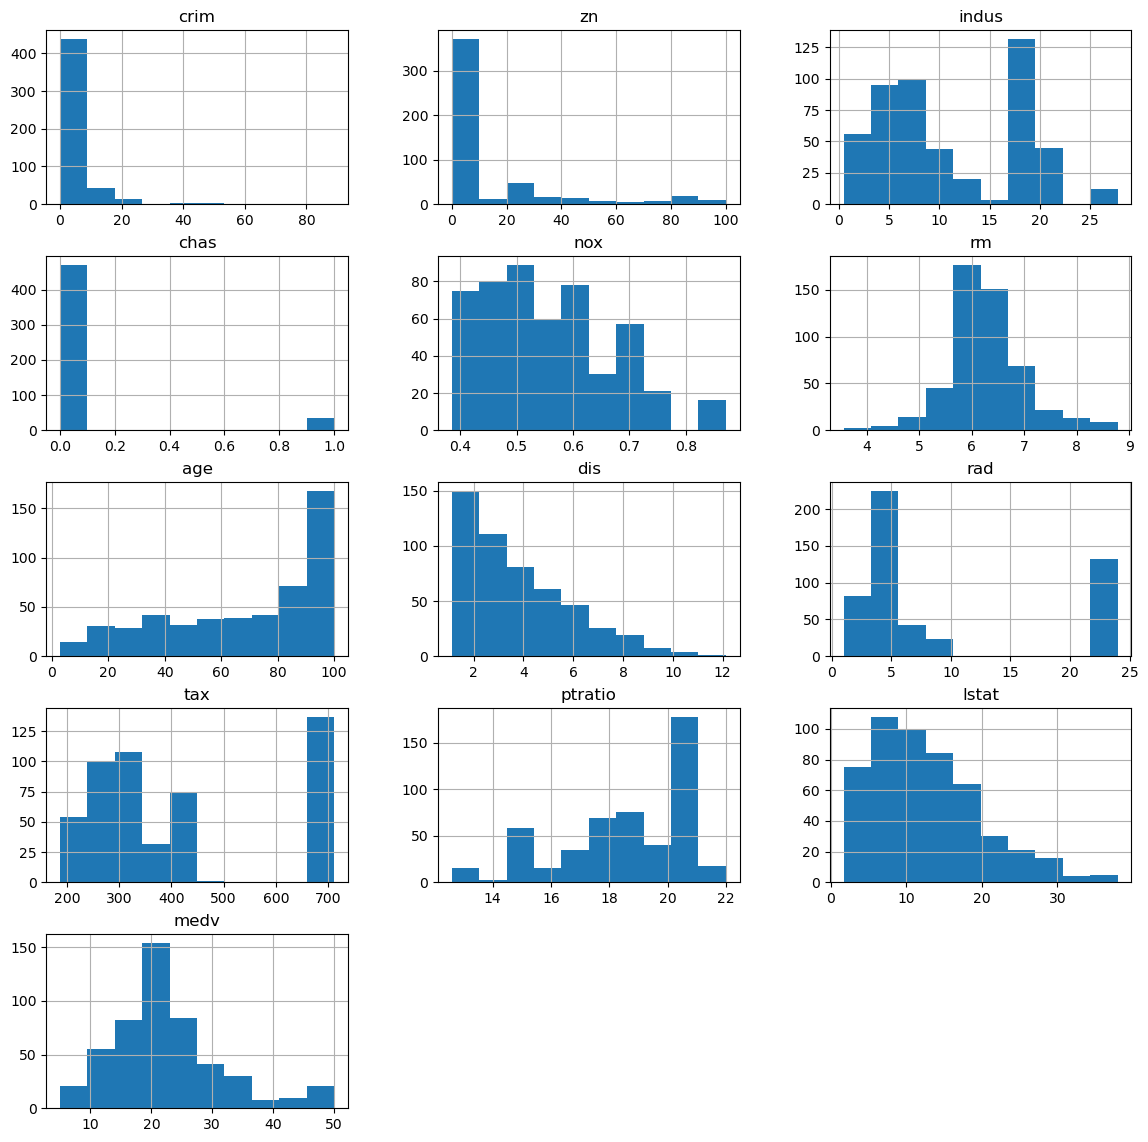

In [9]:
# Plot histograms for all data columns
housing.hist(figsize = (14,14), layout = (5,3))
plt.show()

The 'rad' feature represents an index, but has an outlying value. We can verify this by looking at the unique values of 'rad'. This value of 24 seems off but represents a big part of the data as indicated by the histogram. We will leave this as-is right now, but further investigation should clarify whether this is a legitimate value, a data error or an the system's internal indication for missing values.

In [10]:
# Print the unique values of feature 'rad'
print(housing.rad.unique())

[ 1  2  3  5  4  8  6  7 24]


### Empirical relation of the features to the target

So far we focused on the exploration of the target and features. What is really interesting is to discover the empirical relation between the features and the target. This is the pattern that you want to capture in an ML model, so let's have a look!

Both the target and features are numerical, so we can make use of scatterplots to get an idea of their relation. The graph below shows a scatterplot of housing values in function of the number of rooms. There is a clear trend visible where the housing price increases with the number of rooms. One would indeed expect that bigger houses are more expensive.

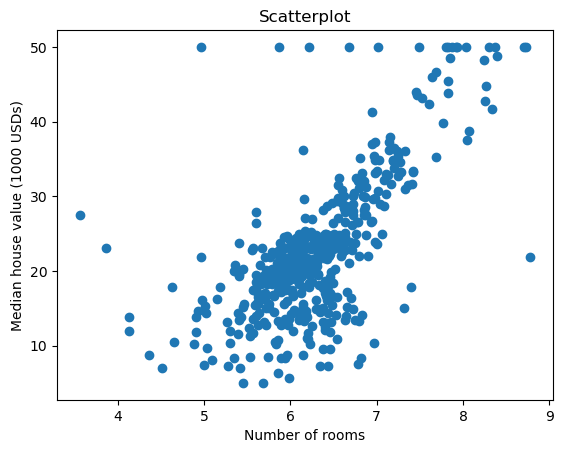

In [11]:
# Scatterplot for 'medv' and 'rm'
plt.scatter(housing.rm, housing.medv)
plt.title('Scatterplot')
plt.xlabel('Number of rooms')
plt.ylabel('Median house value (1000 USDs)')
plt.show()

The graph below shows a scatterplot of housing values in function of the lower population status percentage. There is a clear trend visible where the housing price decreases for higher proportions of lower status neighborhoods. One would indeed expect that houses in those areas are less expensive because living needs to stay affordable for people.

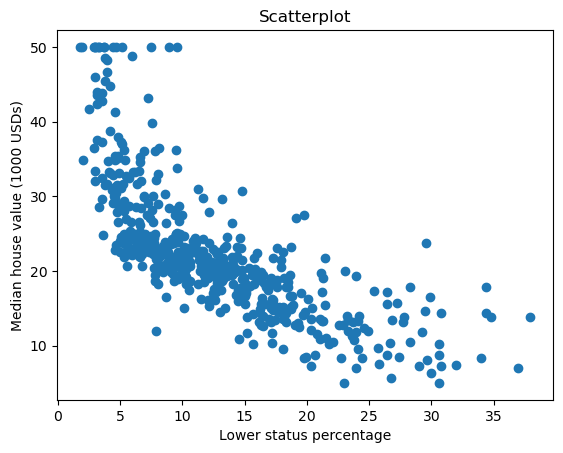

In [12]:
# Scatterplot for 'medv' and 'lstat'
plt.scatter(housing.lstat, housing.medv)
plt.title('Scatterplot')
plt.xlabel('Lower status percentage')
plt.ylabel('Median house value (1000 USDs)')
plt.show()

The graph below shows boxplots of our target, grouped by the 'chas' index. Areas that bound the Charles River seems to have higher housing values.

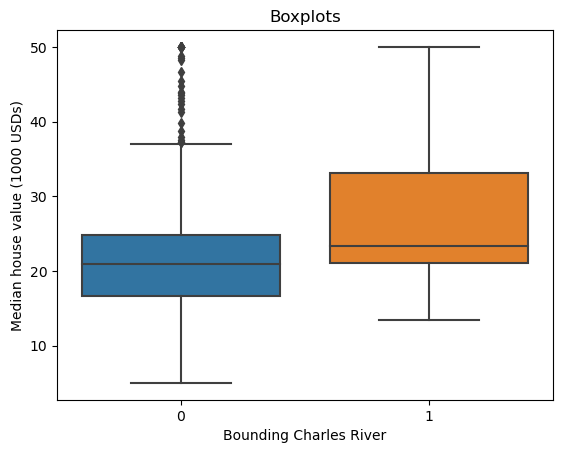

In [13]:
# Boxplots for 'medv' grouped by 'chas'
import seaborn as sns
sns.boxplot(x = "chas", y = "medv", data = housing)
plt.title('Boxplots')
plt.xlabel('Bounding Charles River')
plt.ylabel('Median house value (1000 USDs)')
plt.show()

The graph below shows boxplots of our target, grouped by the 'rad' index, but no clear trend becomes apparent at first sight.

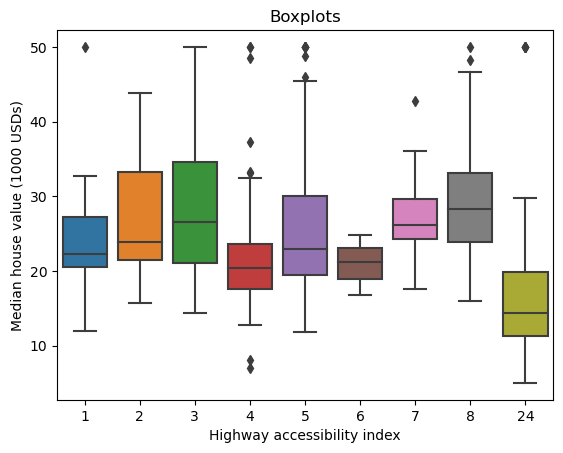

In [14]:
# Boxplots for 'medv' grouped by 'rad'
sns.boxplot(x = "rad", y = "medv", data = housing)
plt.title('Boxplots')
plt.xlabel('Highway accessibility index')
plt.ylabel('Median house value (1000 USDs)')
plt.show()

But that's enough on the data itself. We have a good understanding of the dataset and can now move on to the modeling playground!

## 3. Modeling

Okay hold up, maybe we are not completely done with the data yet. Some preparation for our modeling phase is still necessary.

### Target and features

We first separate the target and features. The target is stored in the object *y*. This is a vector (pandas Series) of length 506. The features are stored in object *X*. This is a matrix (pandas DataFrame) with 506 rows and 12 columns, one for each feature.

In [15]:
# Extract target vector y from the data
y = housing.medv
print(type(y))
print(y.shape)
print('\nSample:')
y.head()

<class 'pandas.core.series.Series'>
(506,)

Sample:


1    24.0
2    21.6
3    34.7
4    33.4
5    36.2
Name: medv, dtype: float64

In [16]:
# Extract feature matrix X from the data
features = list(set(housing.columns) - set(['medv']))
X = housing[features]
print(type(X))
print(X.shape)
print('\nSample:')
X.head()

<class 'pandas.core.frame.DataFrame'>
(506, 12)

Sample:


,chas,lstat,indus,nox,rm,zn,crim,ptratio,age,rad,dis,tax
1,0,4.98,2.31,0.538,6.575,18.0,0.00632,15.3,65.2,1,4.0900,296
2,0,9.14,7.07,0.469,6.421,0.0,0.02731,17.8,78.9,2,4.9671,242
3,0,4.03,7.07,0.469,7.185,0.0,0.02729,17.8,61.1,2,4.9671,242
4,0,2.94,2.18,0.458,6.998,0.0,0.03237,18.7,45.8,3,6.0622,222
5,0,5.33,2.18,0.458,7.147,0.0,0.06905,18.7,54.2,3,6.0622,222


### Feature engineering

Feature engineering is the process of turning raw data into features that we can use in an ML model. Both our target and all features are already represented in a numerical format, interpretable by an ML model. So even though feature engineering is extremely important, we don't need to do anything.

### Data splitting

Before fitting ML models, we split the full dataset in **train** and **test** data. The train data is used to train the ML model while the test data is used to evaluate the model's performance. A very popular package for ML in Python is [scikit-learn](https://scikit-learn.org/stable/). The 'model_selection' module contains a train_test_split() function to make life easy for us. We keep 70% of the data for training while using 30% of the data for evaluation later on. We also keep the target's distribution in the train and test set similar via stratification. Don't mind this technical term, but keeping those distributions similar is important to allow for representative training and fair evaluation. Train data is indicated via '\_train' and test data via '\_test'.

In [17]:
# Perform a train-test plit on the data
# Import the numpy package
import numpy as np
# Import 'model_selection' module from 'sklearn' package
from sklearn import model_selection as ms
# Use the train_test_split() function to split the data
X_train, X_test, y_train, y_test = ms.train_test_split(X, y,
                                                       test_size = 0.3,
                                                       random_state = 5678,
                                                       stratify = np.digitize(y, np.linspace(min(y), max(y), 20)))

Below we show how the test data contains 152 observations (equal to 30% of the data), while the train data contains 354 observations.

In [18]:
# Compare dataset sizes
# Expected number of observations in test set
print('30% of the data:', round(len(y) * 0.3))
# Number of obevations in test set
print('test observations:', len(y_test))
#Number of observations in training set
print('train observations:', len(y_train))

30% of the data: 152
test observations: 152
train observations: 354


The graph below shows that stratification actually worked. The distribution of our target is similar in the train (blue) and test (orange) set.

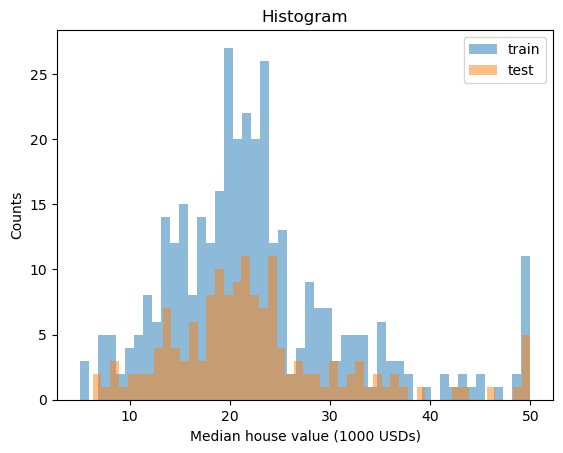

In [19]:
# Stratification check
plt.hist(y_train, bins = 50, alpha=0.5, label = 'train')
plt.hist(y_test, bins = 50, alpha=0.5, label = 'test')
plt.title('Histogram')
plt.xlabel('Median house value (1000 USDs)')
plt.ylabel('Counts')
plt.legend(loc = 'upper right')
plt.show()

### Baseline linear regression model

We start by fitting a linear regression model via ordinary least squares (OLS) as baseline. Linear regression is a classical statistics approach to model a continuous dependent variable such as our housing value amounts. We will make use of the [statsmodels](https://www.statsmodels.org/stable/index.html), a popular Python package for statistical modeling. We fit the OLS model to the training targets (*y_train*) by making use of the training feature matrix in dummy format (*X_train*).

In [20]:
# Fit a linear regression model
# Import 'statsmodels.api'
import statsmodels.api as sm
# Fit an Ordinary Least Squares (OLS) regression model
lin_reg = sm.OLS(y_train, sm.add_constant(X_train)).fit()

After the successful model fitting, we can inspect the summary results of our regression model. A lot of information is shown, but the the coefficients for each feature are the most interesting to look at. These coefficients allow to exactly calculate the predicted housing prices for each suburb area.

In [21]:
# Inspect the regression results
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     87.49
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           2.60e-96
Time:                        19:20:21   Log-Likelihood:                -1039.4
No. Observations:                 354   AIC:                             2105.
Df Residuals:                     341   BIC:                             2155.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5783      5.815      5.430      0.000      20.140      43.017
chas           1.0371      1.144      0.906      0.365      -1.214       3.288
lstat         -0.5707      0.062     -9.172      0.000      -0.693      -0.448
indus          0.0571      0.072      0.796      0.427      -0.084       0.198
nox          -14.4009      4.437     -3.246      0.001     -23.128      -5.674
rm             4.6241      0.510      9.063      0.000       3.621       5.628
zn             0.0334      0.016      2.041      0.042       0.001       0.066
crim          -0.1308      0.034     -3.804      0.000      -0.198      -0.063
ptratio       -0.8114      0.154     -5.269      0.000      -1.114      -0.509
age           -0.0074      0.015     -0.479      0.633      -0.038       0.023
rad            0.2232      0.079      2.823      0.005       0.068       0.379
dis           -1.4347      0.235     -6.103      0.000      -1.897      -0.972
tax           -0.0120      0.005     -2.632      0.009      -0.021      -0.003
==============================================================================
Omnibus:                      159.101   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              920.917
Skew:                           1.816   Prob(JB):                    1.06e-200
Kurtosis:                      10.018   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We won't go into details of the linear regression model structure, but focus on the interpretation of the obtained results. The coefficient 'const' = 31.6 indicates the prediction for a property where all features have the value of zero. The negative coefficient of the feature 'lstat' indicates that increasing the lower population status percentage decreases the predicted value (remember that trend before). The positive coefficient of 'rm' indicates that increasing the number of rooms inflates the property value (remember that trend as well). More specifically even, increasing the number of rooms with 1 increases the value with 4.6, intuitive right? The sign and magnitude of coefficients can be used to determine the effect of each housing feature on the property value.

### Simple regression tree

We now fit a simple regression tree to illustrate the model structure of a tree model. For this we use the decision tree regressor from scikit-learn to model the training targets (*y_train*) based on the training feature matrix (*X_train*). We use a maximum tree depth equal to two to keep results intuitive and transparent. Furthermore, we make use of the mean squared error (MSE) as loss function during model training.

In [22]:
# Fit a simple regression tree
# Import 'DecisionTreeRegressor' from 'sklearn.tree'
from sklearn.tree import DecisionTreeRegressor
# Fit a simple regresstion tree of depth 2 using the Mean Squared Error (MSE) loss function
simple_tree = DecisionTreeRegressor(criterion = "mse", max_depth = 2).fit(X_train, y_train)

The tree structure is very easily visualized to show the underlying decision process.

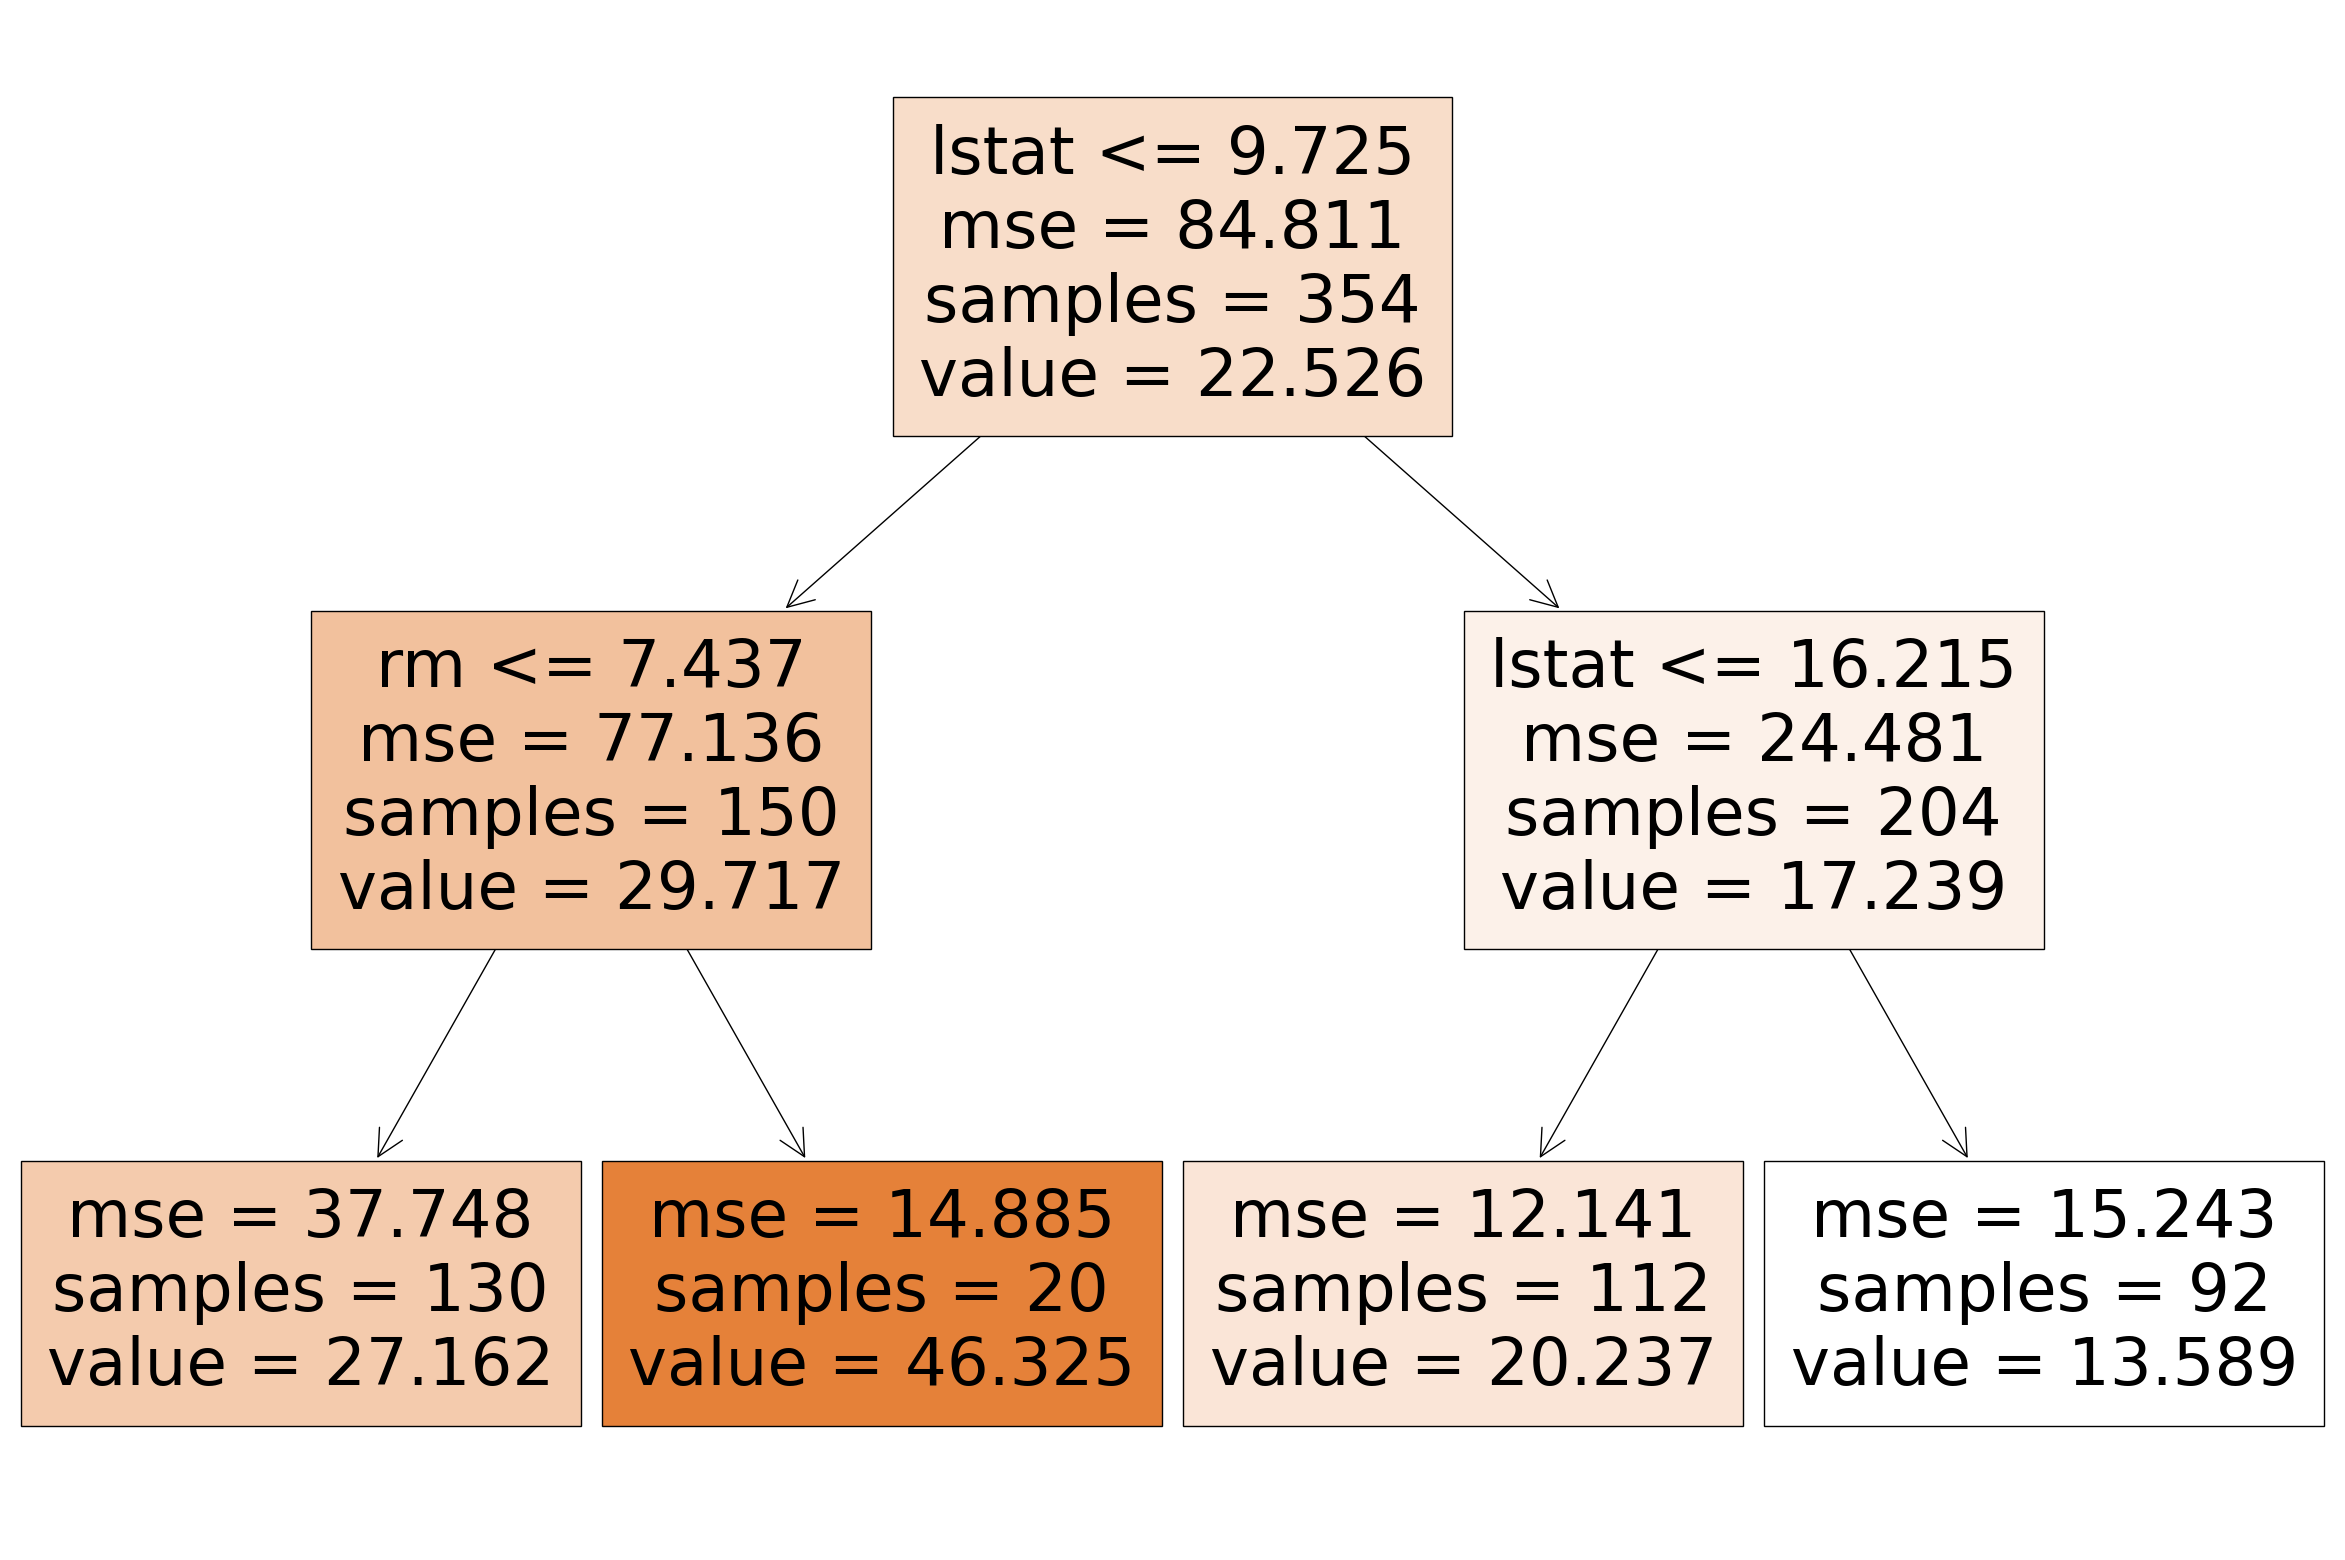

In [23]:
# Visualize the simple regression tree
# Import the 'tree' module from the package 'sklearn'
from sklearn import tree
# Plot the tree structure using the 'plot_tree()' function
plt.figure(figsize = (30,20))
tree.plot_tree(simple_tree, feature_names = features, filled = True)
plt.show()

The first split checks whether lstat <= 9.725 is true (go left) or false (go right). This means that properties in wealthy suburbs with few lower status population go to the left and the other less wealthy ones go to the right of the tree.

The next split on the left side of the tree checks whether rm <= 7.437 is true (go left) or false (go right). This means that small houses go to the left of the node and big houses go to the right of the node. The leftmost bottom node therefore collects all 130 wealthy areas with small houses in our data, which have a value of 27.162 on average. The same reasoning allows us to conclude that wealthy areas with big houses have a value of 46.325 on average.

On the right side of the tree there is another split on 'lstat'. This means that areas with 9.725 < lstat <= 16.215 have a value of 20.237 on average and areas with lstat > 16.215 have a value of 13.589 on average.

This simple tree therefore shows four possible housing valuations for suburbs:
- IF wealthy \& small houses THEN 27
- IF wealthy \& big houses THEN 46
- IF medium wealthy THEN 20
- IF not wealthy THEN 14

This decision proces is also visualized in the graph below where we seperate the four options over the 'lstat' and 'rm' features. The wealthy areas are indicated by purple dots, medium wealthy by blue, not wealthy and small houses in green and finally not wealthy and big houses in yellow,

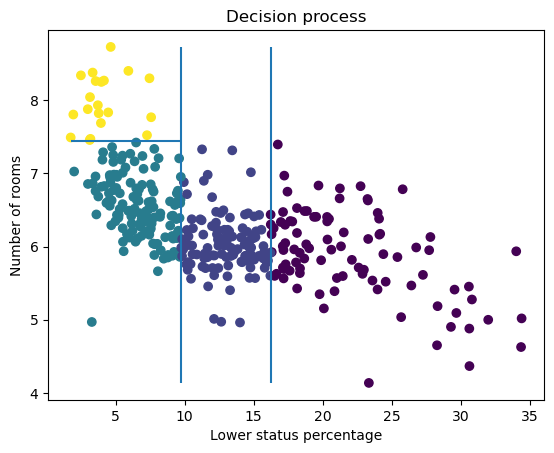

In [24]:
# Plot the decision process of the regression tree
plt.scatter(X_train.lstat, X_train.rm, c = simple_tree.predict(X_train))
plt.vlines(9.725, ymin = min(X_train.rm), ymax = max(X_train.rm))
plt.hlines(7.437, xmin = min(X_train.lstat), xmax = 9.725)
plt.vlines(16.215, ymin = min(X_train.rm), ymax = max(X_train.rm))
plt.title('Decision process')
plt.xlabel('Lower status percentage')
plt.ylabel('Number of rooms')
plt.show()

We can also assess each feature's predictive power by calculating the so-called feature importance metric. Below we show how 'lstat' explains 71% of the predictive power and 'rm' 29%. For this tree this is not super informative, but this measure becomes really helpful when working with big complex black box models.

In [25]:
# Inspect feature importance values
import pandas as pd
pd.DataFrame(data = simple_tree.feature_importances_,
             index = features,
             columns = ['importance'])[simple_tree.feature_importances_ > 0]

,importance
lstat,0.711398
rm,0.288602


### Optimal regression tree

Let's now fit a slightly more complicated regression tree. We allow the tree to take a maximum depth of 10 and will search for the optimal tree depth. How do we do that? This is where the **validation** data comes in. We use part of the training data to evaluate all depth options and choose the depth that leads to the best performance. For now we define performance as the **MSE** but we come back to this later. *Sidenote: we use a more complicated setup of cross-validation (instead of one simple train-validation split) which has some advantages, but the implementation details are not a priority here.*

In [26]:
# Perform cross-validation to assess different tree depth options
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

cv_grid = GridSearchCV(DecisionTreeRegressor(random_state = 1),
                       param_grid = {'max_depth':(1,2,3,4,5,6,7,8,9,10)},
                       scoring = make_scorer(mean_squared_error, greater_is_better = False),
                       cv = 5, refit = True).fit(X_train, y_train)

Below we visualize the MSE performance on our validation data for each tree depth. It is clear that performance improves from depth 1 to depth 6. For larger trees (depth > 6), the MSE increases again. This indicates that the tree becomes too complex and starts overfitting. We therefore pick the tree of depth 6 as optimal model.

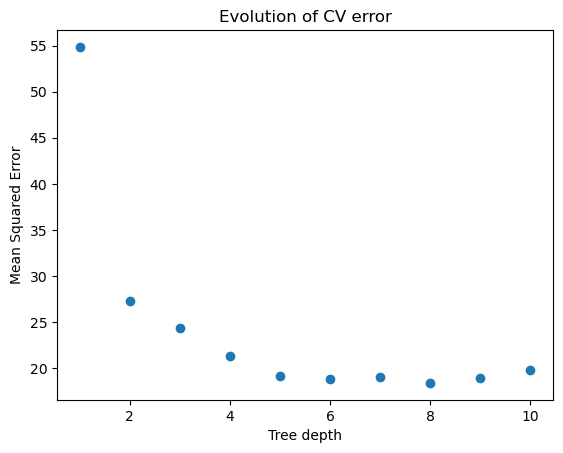

In [27]:
# Visualize the accuracy performance for each tree depth
plt.scatter(x = [1,2,3,4,5,6,7,8,9,10],
            y = -cv_grid.cv_results_.get('mean_test_score'))
plt.title('Evolution of CV error')
plt.xlabel('Tree depth')
plt.ylabel('Mean Squared Error')
plt.show()

The optimal tree of depth 6 is visualized below. The underlying decision process can be unraveled in the exact same way as before.

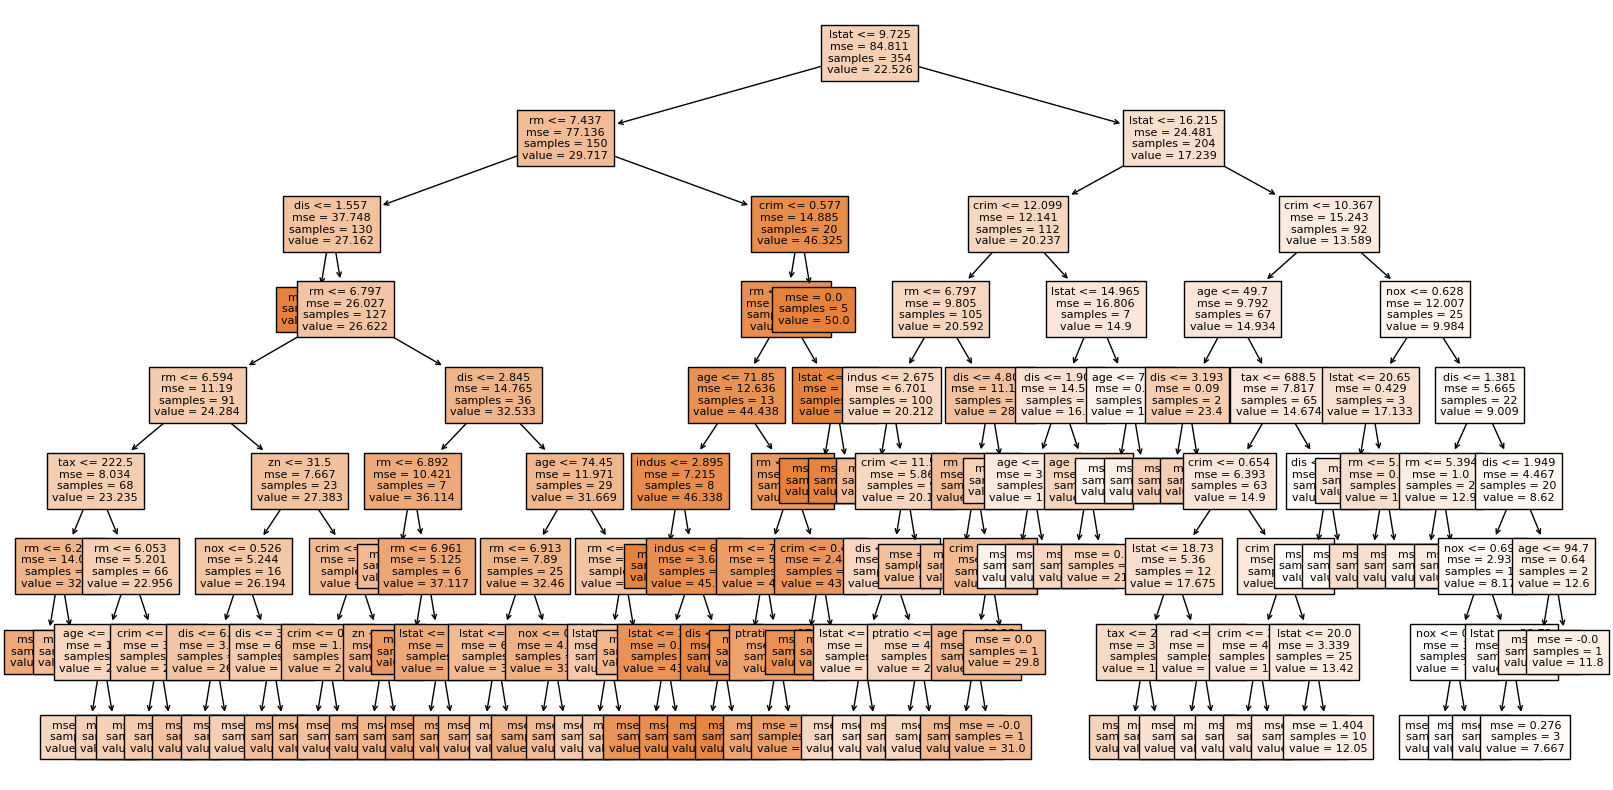

In [28]:
# Visualize the optimal decicion tree
plt.figure(figsize = (20,10))
best_tree = cv_grid.best_estimator_
tree.plot_tree(best_tree, feature_names = features, filled = True, fontsize = 8)
plt.show()

The feature importance scores now contain more features than in the case of our simple regression tree. We observe that 'lstat and 'rm' are still by far the most important features as together the still explain over 86% of the predictive power.

In [29]:
# Inspect feature importance values
pd.DataFrame(data = best_tree.feature_importances_,
             index = features,
             columns = ['importance']).sort_values('importance', ascending = False)

,importance
lstat,0.543211
rm,0.312331
dis,0.068612
crim,0.035725
age,0.012222
tax,0.010135
nox,0.008474
indus,0.004853
zn,0.002545
ptratio,0.001723


### Model evaluation

We now have two models which we can compare, namely the linear regression model and the optimal regression tree of depth 6. Let's evaluate these two models on the **test** data to assess the predictive generalization performance towards unseen data. For both models we calculate the predicted housing values of all observations in the test data.

In [30]:
preds_linr = lin_reg.predict(sm.add_constant(X_test))
preds_tree = best_tree.predict(X_test)

For evaluation purposes, we now want to compare the predictions of both models to the observed housing values in the test data. The two graphs below show scatterplots of the observed values in function of the predictions for the linear model (left) and tree (right). The blue dots should be as close as possible to the red line, because then the observed and predicted values are equal. These plots do not really say which model performs best, but teaches us two interesting facts:
- Predictions for the linear model are of a continuous nature, while the tree results in discrete predictions. A tree can by design only return as many predictions as there are leaf nodes, which is not the case for linear models.
- The linear model can result in negative value predictions in some cases. This is of course not feasible in reality and should be corrected a-posteriori.

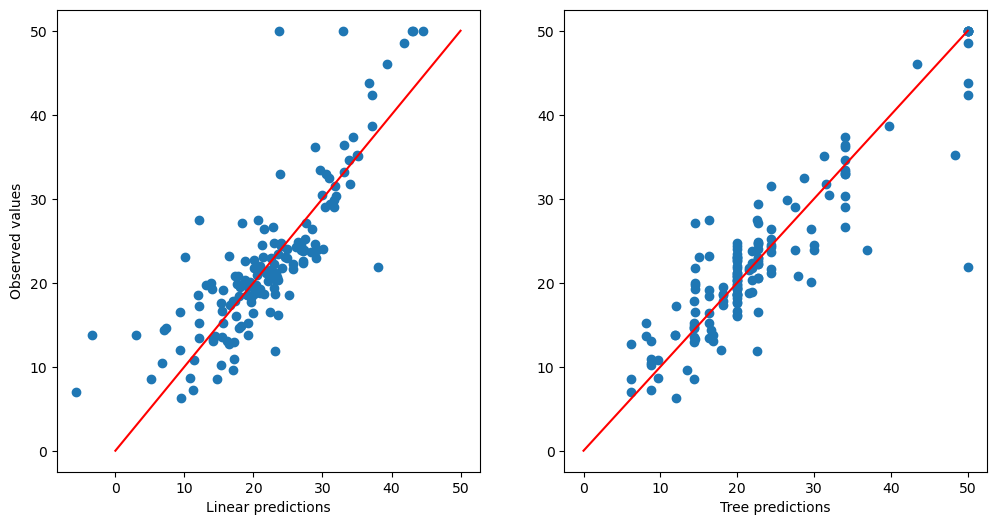

In [31]:
# Compare observed and predicted values
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.scatter(x = preds_linr,
            y = y_test)
plt.plot([0,50], [0,50], 'r')
plt.xlabel('Linear predictions')
plt.ylabel('Observed values')
plt.subplot(1, 2, 2)
plt.scatter(x = preds_tree,
            y = y_test)
plt.plot([0,50], [0,50], 'r')
plt.xlabel('Tree predictions')
plt.show()

We can summarize these graphs in one performance measure via for example the $MSE = \frac{1}{N}\sum_{i=1}^N(y_i - \hat{y}_i)^2$ with $N$ the number of observations, $y_i$ the observed targets and $\hat{y}_i$ the predicted targets. We calculate the MSE values and observe that the regression tree is performing better than the linear regression model, as lower MSE indicates better performance.

In [32]:
# Calculate the MSE
print('Test MSE regression tree:', mean_squared_error(y_test, preds_tree))
print('Test MSE linear regression:', mean_squared_error(y_test, preds_linr))
print('\nManual checks:')
print('RT: ', sum((y_test - preds_tree)**2) / len(y_test))
print('LR: ', sum((y_test - preds_linr)**2) / len(y_test))

Test MSE regression tree: 20.401408976801577
Test MSE linear regression: 28.743160598910162

Manual checks:
RT:  20.401408976801587
LR:  28.743160598910166


We can try out another measure, for example the mean absolute error $MAE = \frac{1}{N}\sum_{i=1}^N|y_i - \hat{y}_i|$. We calculate the MAE values and observe that the regression tree is again performing better than the linear regression model, as lower MAE indicates better performance.

In [33]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
print('Test MAE regression tree:', mean_absolute_error(y_test, preds_tree))
print('Test MAE linear regression:', mean_absolute_error(y_test, preds_linr))
print('\nManual checks:')
print('RT: ', sum(np.abs(y_test - preds_tree)) / len(y_test))
print('LR: ', sum(np.abs(y_test - preds_linr)) / len(y_test))

Test MAE regression tree: 2.9584180284799477
Test MAE linear regression: 3.787467657613744

Manual checks:
RT:  2.958418028479947
LR:  3.787467657613746


This analysis shows that two different metrics prefer the tree model over the linear one in the end. It is therefore clear that we should continue working with the regression tree as best AI solution for our business problem.

## 4. Deployment & 5. Monitoring

Once you picked a model it is time to leave the data scientist's playground and put that model in production where it can start delivering actual business value. We discuss deployment and monitoring in modules 4 and 5 of the AI4Business course, so stay tuned!

![AI4Business](img/AI4Business.png)